In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from utils import *
import cv2

# 1. Load in image

In [171]:
mat_contents = scipy.io.loadmat('./matlab_files/mid_saggital_image_data.mat')
#print ("Matrix Contents: ", mat_contents)
raw_img = mat_contents['mid_sag_img_data']
print ("Image Data: ", raw_img.shape)
img_data = raw_img.copy()

Image Data:  (202, 206)


Raw image

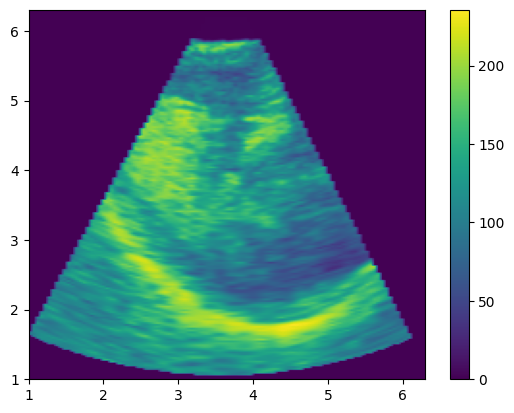

In [157]:
# Display the image
newC=[206, 206, 206]
newscale=[0.0306, 0.0306, 0.0306]
plt.imshow(raw_img, extent=(1, newC[0]*newscale[0], 1, newC[1]*newscale[1]), aspect='auto')
plt.colorbar()
plt.show()

In [158]:
slice = raw_img[(-40-40):-40-20,50:70 ]
print(slice)
print(np.min(slice))

[[199.20243137 186.22427791 170.11599383 151.69968816 132.48290738
  128.68827491 130.52321539 133.06573867 135.87978937 142.49553687
  150.64324295 153.63204468 154.43998885 147.2738435  136.57460865
  128.0749918  120.59598789 117.69362019 117.0133723  115.38256494]
 [203.49277503 198.15756866 191.7215231  178.99357745 164.08345574
  149.75352724 135.63538766 131.83229969 131.9875037  130.50293114
  128.35758262 126.47528784 124.7041955  127.70465949 132.81926272
  134.65230187 134.9627099  130.62721272 124.03596314 120.73405283]
 [204.02215683 202.72811642 201.08030403 198.09377354 194.64294473
  187.64925368 179.36230561 171.88356765 164.71497178 158.16776776
  151.87096419 146.29600635 141.0261991  134.85173775 128.27645021
  125.5236998  124.54458959 126.43230596 129.71196872 128.52760888]
 [197.74806903 194.80038625 192.24885749 191.3376308  190.99529869
  192.15768816 193.86934869 192.42253362 189.76368695 181.77399245
  171.63614186 161.6410374  151.70627693 146.25360271 142.7

C:\Users\awong\AppData\Local\Temp\ipykernel_39068\3404401473.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img_data[i,j] = np.random.choice(slice.flatten(), 1)


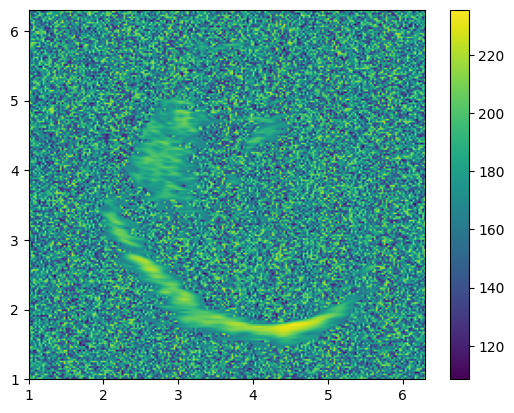

In [164]:
img_data = raw_img.copy()
for i in range(raw_img.shape[0]):
    for j in range(raw_img.shape[1]):
        if raw_img[i,j] < np.mean(slice.flatten())-10:
            img_data[i,j] = np.random.choice(slice.flatten(), 1)

# img_data = np.where(raw_img == 0, np.random.choice(slice.flatten(), 1), raw_img)
newC=[206, 206, 206]
newscale=[0.0306, 0.0306, 0.0306]
plt.imshow(img_data, extent=(1, newC[0]*newscale[0], 1, newC[1]*newscale[1]), aspect='auto')
plt.colorbar()
plt.show()

# 2. Smooth + Threshold

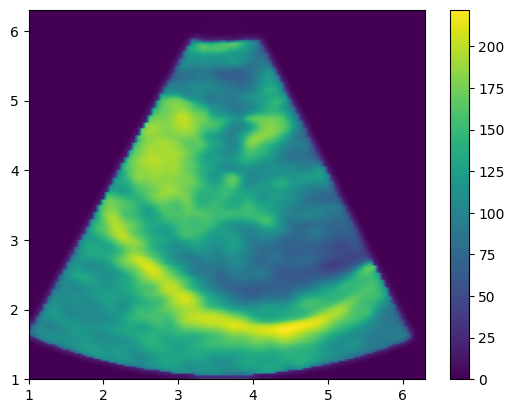

In [172]:
# Apply smoothing
args_bf = {'type': 'bilateral_filter', 'd': 9, 'sigmaColor': 75, 'sigmaSpace': 75}
args_nlm = {'type': 'nl_means', 'h': 10, 'templateWindowSize': 7, 'searchWindowSize': 21}
smoothed = smooth(img_data, args_bf)
newC=[206, 206, 206]
newscale=[0.0306, 0.0306, 0.0306]
plt.imshow(smoothed, extent=(1, newC[0]*newscale[0], 1, newC[1]*newscale[1]), aspect='auto')
plt.colorbar()
plt.show()

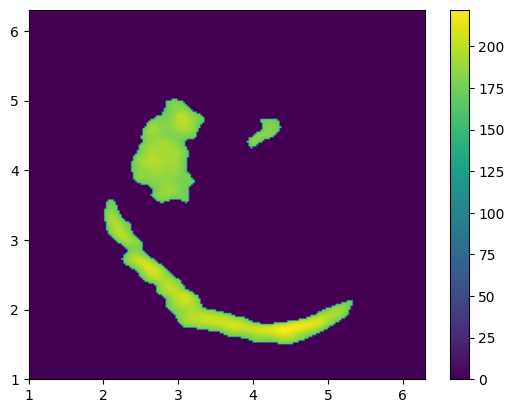

In [182]:
# Naive thresholding
# threshold = np.percentile(smoothed, 87)  # Adjust this percentile to isolate yellow regions
threshold = 170
thresholded = np.where(smoothed > threshold, smoothed, 0)
# Display the image
newC=[206, 206, 206]
newscale=[0.0306, 0.0306, 0.0306]
plt.imshow(thresholded, extent=(1, newC[0]*newscale[0], 1, newC[1]*newscale[1]), aspect='auto')
plt.colorbar()
plt.show()

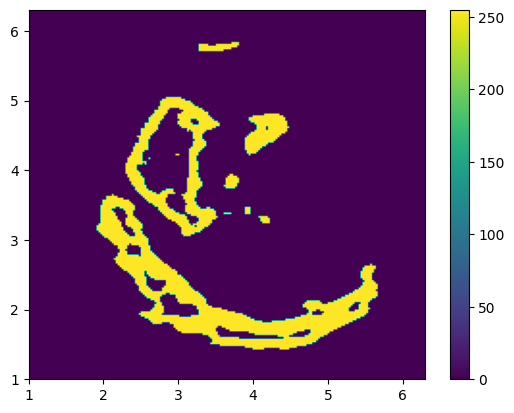

In [177]:
# Adaptive thresholding
threshold = 150
thresholded = np.where(smoothed > threshold, smoothed, 0)
thresholded = thresholded.astype(np.uint8)
smoothed = smoothed.astype(np.uint8)
thresholded = cv2.adaptiveThreshold(
    thresholded,               # Source image
    maxValue=255,        # Maximum value to assign to pixels exceeding the threshold
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,  # Adaptive method
    thresholdType=cv2.THRESH_BINARY,            # Type of thresholding
    blockSize=11,        # Size of the local region
    C=-5                  # Constant subtracted from the calculated threshold
)
smoothed = smoothed.astype(np.float64)
thresholded = thresholded.astype(np.float64)
# Display the image
newC=[206, 206, 206]
newscale=[0.0306, 0.0306, 0.0306]
plt.imshow(thresholded, extent=(1, newC[0]*newscale[0], 1, newC[1]*newscale[1]), aspect='auto')
plt.colorbar()
plt.show()

# MRI SCAN

In [178]:
mri_mat_contents = scipy.io.loadmat('./matlab_files/mri_mid_slice_image_data.mat')
mid_slice_img_data = mri_mat_contents['mid_slice_img_data']
newMRIC = mri_mat_contents['newMRIC'].flatten()  # Make sure you're using the right variable
newscale_mri = mri_mat_contents['newscale'].flatten()  # Use a different variable to avoid confusion
mid_slice_img_data = np.flip(mid_slice_img_data, axis=1)
print(np.max(mid_slice_img_data))

2500.105081194566


In [185]:
print(newMRIC[0]*newscale_mri[0])
print(newMRIC[1]*newscale_mri[1])

25.523516803344794
23.934028331759247


In [179]:
from utils import *

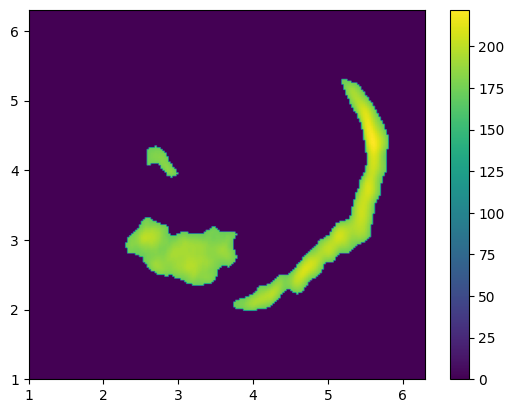

In [183]:
rotated = rotate_image(thresholded, 90)
plt.imshow(rotated, extent=(1, newC[0]*newscale[0], 1, newC[1]*newscale[1]), aspect='auto')
plt.colorbar()
plt.show()